In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import math
from dataset2pkl_train import MILDataset # traim
# from dataset2pkl_test_public import MILDataset # test_public
import pickle
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

/home/admin/.cache/pypoetry/virtualenvs/baseline-rMRJIzgu-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../dataset/train_dataset.csv')

In [3]:
# file size

def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

for index, slide_name in enumerate(df['Slide_name'].tolist()):
    try:
        slide_path = f'../dataset/train/{slide_name}.png'
        mask_path = f'../re_pickle_train_mask/{slide_name}_mask.pkl'
        patch_path = f'../re_pickle_train_patch/{slide_name}_patch.pkl'

        # path_mask_size = Path(mask_path).stat().st_size
        # os_mask_size = os.stat(mask_path).st_size
        os_mask_size_1 = os.path.getsize(mask_path)
        # path_patch_size = Path(patch_path).stat().st_size
        # os_patch_size = os.stat(patch_path).st_size
        os_patch_size_1 = os.path.getsize(patch_path)
        
        # print(f"[{slide_name}] File Size : (mask) {path_mask_size} {os_mask_size} {os_mask_size_1} {convert_size(os_mask_size_1)} | (patch) {path_patch_size} {os_patch_size} {os_patch_size_1} {convert_size(os_patch_size_1)}, bytes")
        print(f"[{slide_name}] File Size : (org) {os.path.getsize(slide_path)} bytes ({convert_size(os.path.getsize(slide_path))}) -> (mask) {os_mask_size_1} bytes ({convert_size(os_mask_size_1)}) | (patch) {os_patch_size_1} bytes ({convert_size(os_patch_size_1)})")
        
        if index == 30:
            break
        
    except FileNotFoundError as err:
        break

[resize_normal_001] File Size : (org) 124627702 bytes (118.85 MB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 62133055 bytes (59.25 MB)
[resize_normal_002] File Size : (org) 68803814 bytes (65.62 MB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 14944135 bytes (14.25 MB)
[resize_normal_003] File Size : (org) 80895729 bytes (77.15 MB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 35392667 bytes (33.75 MB)
[resize_normal_004] File Size : (org) 49907202 bytes (47.6 MB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 11798207 bytes (11.25 MB)
[resize_normal_005] File Size : (org) 129816560 bytes (123.8 MB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 24381919 bytes (23.25 MB)
[resize_normal_006] File Size : (org) 416752 bytes (406.98 KB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 868 bytes (868.0 B)
[resize_normal_007] File Size : (org) 148258128 bytes (141.39 MB) -> (mask) 134217891 bytes (128.0 MB) | (patch) 105389565 bytes (100.51 MB)
[resize_normal_008] File Size : (org) 7477

In [5]:
# data shape

# for index, slide_name in enumerate(df['Slide_name'].tolist()):
for i in range(5,10):
    slide_name = df.iloc[i]['Slide_name']
    print(slide_name)
    try:
        slide_path = f'../dataset/train/{slide_name}.png'
        mask_path = f'../re_pickle_train_mask/{slide_name}_mask.pkl' # f'../img_pickle_mask/dataset_{slide_name}_mask.pkl'
        patch_path = f'../re_pickle_train_patch/{slide_name}_patch.pkl' # f'../img_pickle_patch/dataset_{slide_name}_patch.pkl'
        
        slide_file = cv2.imread(slide_path)
        with open(mask_path, 'rb') as f:
            mask_file = pickle.load(f)
        with open(patch_path, 'rb') as f:
            patch_file = pickle.load(f)
        
        print(f'  slide_file : {type(slide_file)} {slide_file.shape} {slide_file.dtype}')
        print(f'  mask_file : {type(mask_file)} {mask_file.shape} {mask_file.dtype}')
        print(f'  patch_file : {type(patch_file)} {len(patch_file)}')
        # print(f'    patch : {type(patch_file[0])} {len(patch_file[0])}')
        for patch in patch_file:
            print(f'    patch : {type(patch)} {len(patch)} (img : {type(patch[0])} {patch[0].dtype} {patch[0].shape} | label : {patch[1]})')
            # print("    ", type(patch), len(patch)) # 2 (return img, label)
            # print("    ", patch[0].shape, patch[1])
            break
            
        # if index == 2:
        #     break
        
    except FileNotFoundError as err:
        break

resize_normal_006
  slide_file : <class 'numpy.ndarray'> (8192, 16384, 3) uint8
  mask_file : <class 'numpy.ndarray'> (8192, 16384) uint8
  patch_file : <class 'dataset2pkl_train.MILDataset'> 0
resize_normal_007
  slide_file : <class 'numpy.ndarray'> (8192, 16384, 3) uint8
  mask_file : <class 'numpy.ndarray'> (8192, 16384) uint8
  patch_file : <class 'dataset2pkl_train.MILDataset'> 134
    patch : <class 'tuple'> 2 (img : <class 'torch.Tensor'> torch.uint8 torch.Size([3, 512, 512]) | label : 0)
resize_normal_008
  slide_file : <class 'numpy.ndarray'> (8192, 16384, 3) uint8
  mask_file : <class 'numpy.ndarray'> (8192, 16384) uint8
  patch_file : <class 'dataset2pkl_train.MILDataset'> 19
    patch : <class 'tuple'> 2 (img : <class 'torch.Tensor'> torch.uint8 torch.Size([3, 512, 512]) | label : 0)
resize_normal_009
  slide_file : <class 'numpy.ndarray'> (8192, 16384, 3) uint8
  mask_file : <class 'numpy.ndarray'> (8192, 16384) uint8
  patch_file : <class 'dataset2pkl_train.MILDataset'> 3

saved File number :  895
365 train_366 (180 patches)
# each patch : <class 'torch.Tensor'>, torch.Size([3, 512, 512]) -> <class 'numpy.ndarray'>, (512, 512, 3)
# each patch : <class 'torch.Tensor'>, torch.Size([3, 512, 512]) -> <class 'numpy.ndarray'>, (512, 512, 3)
# each patch : <class 'torch.Tensor'>, torch.Size([3, 512, 512]) -> <class 'numpy.ndarray'>, (512, 512, 3)
# each patch : <class 'torch.Tensor'>, torch.Size([3, 512, 512]) -> <class 'numpy.ndarray'>, (512, 512, 3)
# each patch : <class 'torch.Tensor'>, torch.Size([3, 512, 512]) -> <class 'numpy.ndarray'>, (512, 512, 3)


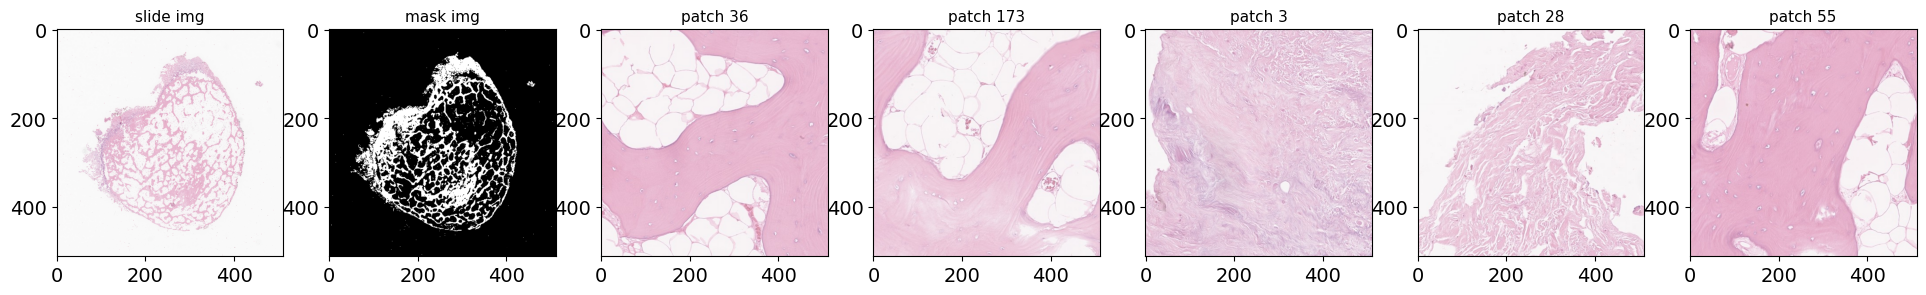

In [18]:
# visualize

# import albumentations as A
# from torch.utils.data import Dataset
# from albumentations.pytorch.transforms import ToTensorV2

# class MILDataset(Dataset): # 참고 https://github.com/MSKCC-Computational-Pathology/MIL-nature-medicine-2019/blob/master/MIL_train.py    
#     def __len__(self):
#         return len(self.patch_list)
#     def __getitem__(self, idx):
#         slide_idx = self.slide_idx[idx]
#         img = self.patch_list[idx]
        
#         # augmentation.
#         transform = A.Compose([
#             # A.Resize(128, 128),
#             A.Resize(512, 512),
#             # A.Rotate(),
#             A.HorizontalFlip(),
#             A.VerticalFlip(),
#             # A.ColorJitter(),
#             A.CLAHE(p=0.1),
#             A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#             ToTensorV2(),
#         ])
#         img = transform(image=img)["image"]
        
#         label = self.label_list[slide_idx]
#         return img, label

file_list = os.listdir('../re_pickle_train_mask/')
file_count = len(file_list)
print("saved File number : ", file_count)

for _ in range(1): # 3 2 
    try:
        index = random.randint(0, file_count) # random.randint(0, len(patch_file))
        # index = 635 455 893 314
        slide_name = df.iloc[index]['Slide_name']
        # print(index, slide_name)

        slide_path = f'../dataset/train/{slide_name}.png'
        mask_path = f'../re_pickle_train_mask/{slide_name}_mask.pkl'
        patch_path = f'../re_pickle_train_patch/{slide_name}_patch.pkl'

        with open(mask_path, 'rb') as f:
            mask_file = pickle.load(f)
        with open(patch_path, 'rb') as f:
            patch_file = pickle.load(f)

        print(f'{index} {slide_name} ({len(patch_file)} patches)')
        plt.figure(figsize=(24, 3)) # (12, 8)

        slide_file = cv2.imread(slide_path)
        slide_file = cv2.cvtColor(slide_file, cv2.COLOR_BGR2RGB) # (OpenCV) BGR -> (matplotlib) RGB
        slide_file = cv2.resize(slide_file, (512, 512))
        
        plt.subplot(1, 7, 1)
        plt.imshow(slide_file)
        plt.title('slide img', fontsize=11)

        mask_file = cv2.resize(mask_file, (512, 512))
        plt.subplot(1, 7, 2)
        plt.imshow(mask_file, cmap='gray')
        plt.title('mask img', fontsize=11)

        for i in range(5):
            idx = random.randint(0, len(patch_file))
            # print(patch_file[idx])
            patch = patch_file[idx][0].T.cpu().numpy()
            print(f'# each patch : {type(patch_file[idx][0])}, {patch_file[idx][0].shape} -> {type(patch)}, {patch.shape}')
            
            plt.subplot(1, 7, i+3)
            plt.imshow(patch) #, cmap='grey')
            plt.title(f'patch {idx}', fontsize=11)

        plt.show()
    
    except FileNotFoundError as err:
        print(f"No file name with index {index}")
        break

In [27]:
# folder = '../img_pickle_mask'
# new_folder = '../img_pickle_mask_unit'
# pkl_list = os.listdir(folder)
# pkl_list.sort()
# # print(len(pkl_list), pkl_list)

# for pkl in pkl_list: # train_001_patch ~ train_345_patch
#     # print('# ', pkl)
#     if 'mask' in pkl: # PATH:
#         if pkl in os.listdir(new_folder):
#             print(pkl)
            
#             path = f'{folder}/{pkl}'
#             new_path = f'{new_folder}/{pkl}'
#             # print(path)
#             # print(new_path)
            
#             with open(path, 'rb') as f:
#                 mask_file = pickle.load(f)
#             with open(new_path, 'rb') as f:
#                 new_mask_file = pickle.load(f)
            
#             assert type(mask_file) == type(new_mask_file)
#             assert mask_file.shape == new_mask_file.shape
#             assert mask_file.dtype == new_mask_file.dtype
#             assert os.path.getsize(path) == os.path.getsize(new_path)
#             # print(f' {path} : {type(mask_file)} {mask_file.shape} {mask_file.dtype} | {os.path.getsize(path)} bytes ({convert_size(os.path.getsize(path))})')
#             # print(f' {new_path} : {type(new_mask_file)} {new_mask_file.shape} {new_mask_file.dtype} | {os.path.getsize(new_path)} bytes ({convert_size(os.path.getsize(new_path))})')

# print()
# print("all files overlapped are same !")
# print()

dataset_train_336_mask.pkl
dataset_train_337_mask.pkl
dataset_train_338_mask.pkl
dataset_train_339_mask.pkl
dataset_train_340_mask.pkl
dataset_train_341_mask.pkl
dataset_train_342_mask.pkl
dataset_train_343_mask.pkl
dataset_train_344_mask.pkl
dataset_train_345_mask.pkl

all files overlapped are same !



In [ ]:
# import shutil

# folder = '../img_pickle_mask'
# new_folder = '../img_pickle_mask_unit'
# pkl_list = os.listdir(folder)
# pkl_list.sort()
# # print(len(pkl_list))

# count = 0
# for pkl in pkl_list: # train_001_patch ~ train_345_patch
#     if 'mask' in pkl:
#         shutil.move(os.path.join(folder, pkl), os.path.join(new_folder, pkl))
#         # print(f' {os.path.join(folder, pkl)} -> {os.path.join(new_folder, pkl)} Done')
#         count+= 1
              
# assert count == len(pkl_list)-1
# print(f"all {count} files in {folder} moved to {new_folder}")

### # check file numbers

In [12]:
# df = pd.read_csv('../dataset/test_public_dataset.csv')

In [20]:
slide_folder = '../dataset/train' # '../dataset/test_public'
mask_folder = '../re_pickle_train_mask' # '../pickle_test_public_mask'
patch_folder = '../re_pickle_train_patch' # '../pickle_test_public_patch'

# print(len(os.listdir(slide_folder)))
# print(len(os.listdir(mask_folder)))
# print(len(os.listdir(patch_folder)))

# slides = os.listdir(slide_folder)
# slides.sort()
# masks = os.listdir(mask_folder)
# masks.sort()
# patches = os.listdir(patch_folder)
# patches.sort()

# print(slides)
# print(masks)
# print(patches)

assert len(os.listdir(slide_folder)) == len(os.listdir(mask_folder)) and len(os.listdir(mask_folder)) == len(os.listdir(patch_folder))
print(f"file numbers of image/mask/patch are same ({len(os.listdir(slide_folder))})")

for index, slide_name in enumerate(tqdm(df['Slide_name'].tolist())):
    slide_name = df.iloc[index]['Slide_name']
    
    slide_path = f'{slide_folder}/{slide_name}.png'
    mask_path = f'{mask_folder}/{slide_name}_mask.pkl'
    patch_path = f'{patch_folder}/{slide_name}_patch.pkl'
    
    # check whether file is in image/mask/patch folder
    assert os.path.exists(slide_path), f'{slide_name} not in {slide_folder}'
    assert os.path.exists(mask_path), f'{mask_name} not in {mask_folder}'
    assert os.path.exists(patch_path),  f'{patch_name} not in {patch_folder}'
print("image/mask/patch for all slides exist correctly !")

file numbers of image/mask/patch are same (895)


100% 894/894 [00:00<00:00, 1797.38it/s]

image/mask/patch for all slides exist correctly !


### # check mask forms

In [21]:
for index, slide_name in enumerate(tqdm(df['Slide_name'].tolist())):
    slide_name = df.iloc[index]['Slide_name']
    slide_path = f'../dataset/train/{slide_name}.png' # f'../dataset/test_public/{slide_name}.png'
    mask_path = f'../re_pickle_train_mask/{slide_name}_mask.pkl' # f'../pickle_test_public_mask/dataset_{slide_name}_mask.pkl'
    
    slide_file = cv2.imread(slide_path)
    with open(mask_path, 'rb') as f:
        mask_file = pickle.load(f)
    assert slide_file.dtype == mask_file.dtype and np.issubdtype(np.uint8, mask_file.dtype), f'[{slide_name}] type(mask) is {mask_file.dtype}'
    assert mask_file.shape[0] == slide_file.shape[0] and mask_file.shape[1] == slide_file.shape[1], f'[{slide_name}] mask shape({mask_file.shape}) != slide shape({slide_file.shape})' 
    
print("all mask images checked!")

100% 894/894 [3:29:13<00:00, 14.04s/it]  

all mask images checked!


### # check patch forms

In [22]:
import torch

len_is_3 = {}
for index, slide_name in enumerate(tqdm(df['Slide_name'].tolist())):
    slide_name = df.iloc[index]['Slide_name']
    patch_path = f'../re_pickle_train_patch/{slide_name}_patch.pkl' # f'../pickle_test_public_patch/dataset_{slide_name}_patch.pkl'
    with open(patch_path, 'rb') as f:
        patch_file = pickle.load(f)
        for patch in patch_file:
            # print(f' [{slide_name}] ({len(patch_file)}) patch : {type(patch)} {len(patch)} (img : {type(patch[0])} {patch[0].dtype} {patch[0].shape} | label : {patch[1]})')
            
            # train
            # assert not torch.is_floating_point(patch[0]), f'[{slide_name}] type(patch[0]) is {patch[0].dtype}'
            # assert patch[0].shape == (3, 512, 512), f'[{slide_name}] patch[0].shape is {patch[0].shape}'
            # assert len(patch) == 2, f'[{slide_name}] len(patch) is {len(patch)}'
            if len(patch) != 2:
                if slide_name not in len_is_3:
                    len_is_3[slide_name] = 0
                # len_is_3.append(slide_name)
                len_is_3[slide_name] += 1
                assert len(patch) == 3, f'[{slide_name}] len(patch) is {len(patch)}'
                assert patch[0].shape == (512, 512), f'[{slide_name}] patch[0].shape is {patch[0].shape}'
            else:
                assert len(patch) == 2, f'[{slide_name}] len(patch) is {len(patch)}'
                assert patch[0].shape == (3, 512, 512), f'[{slide_name}] patch[0].shape is {patch[0].shape}'
                assert isinstance(patch[1], int), f'patch[1] type is {type(patch[1])}'
            
            # test_public
            # assert len(patch) == 3, f'[{slide_name}] len(patch) is {len(patch)}' # (3, 512, 512)
            # assert not torch.is_floating_point(patch), f'[{slide_name}] type(patch) is {patch.dtype}'
            # assert patch.shape == (3, 512, 512), f'[{slide_name}] patch[0].shape is {patch.shape}'
            
            # break 

print("all patch images checked !")

100% 894/894 [1:10:14<00:00,  4.71s/it]

all patch images checked !


In [23]:
print(len(len_is_3), len_is_3) # should be zero for train set

0 {}


In [ ]:
# df = pd.read_csv('../dataset/test_public_dataset.csv')

# mask_root = '../pickle_test_public_mask/'
# mask_list = os.listdir(mask_root)
# mask_list.sort()
# for index, file_name in enumerate(tqdm(mask_list)):
#     if 'mask' not in file_name:
#         # print(file_name)
#         continue
#     # print(f'{os.path.join(mask_root, file_name)} -> {os.path.join(mask_root, file_name[8:])}')
#     # break
#     os.rename(os.path.join(mask_root, file_name), os.path.join(mask_root, file_name[8:]))

# patch_root = '../pickle_test_public_patch/'
# patch_list = os.listdir(patch_root)
# patch_list.sort()
# for index, file_name in enumerate(tqdm(patch_list)):
#     if 'patch' not in file_name:
#         # print(file_name)
#         continue
#     # print(f'{os.path.join(patch_root, file_name)} -> {os.path.join(patch_root, file_name[8:])}')
#     # break
#     os.rename(os.path.join(patch_root, file_name), os.path.join(patch_root, file_name[8:]))

In [ ]:
# print(len(os.listdir(mask_root)))
# print(len(os.listdir(patch_root)))